# Mini Project : Anxiety Severity Prediction - 2211CS010686 (S3 - 88) 

### Source: https://github.com/GopalapuramBhavana/AnxioSense.git
### Dataset: anxiety_attack_dataset.csv

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("anxiety_attack_dataset.csv")
df

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


# Dataset Overview

| Column   | Data Type  | Description |
|----------|------------|-------------|
| **ID** | `int64` | Unique identifier for each participant in the dataset. |
| **Age** | `int64` | Age of the participant (in years). |
| **Gender** | `string` | Gender of the participant (Male, Female, Other). |
| **Occupation** | `string` | Participant’s occupation (e.g., Student, Employee, Homemaker, etc.). |
| **Sleep Hours** | `float64` | Average number of hours the participant sleeps per day. |
| **Physical Activity (hrs/week)** | `float64` | Weekly hours spent on physical activities such as exercise, sports, or yoga. |
| **Caffeine Intake (mg/day)** | `int64` | Daily caffeine intake measured in milligrams. |
| **Alcohol Consumption (drinks/week)** | `int64` | Number of alcoholic drinks consumed per week. |
| **Smoking** | `string` | Smoking status of the participant (Yes/No/Occasional). |
| **Family History of Anxiety** | `string` | Indicates whether the participant has a family history of anxiety (Yes/No). |
| **Stress Level (1-10)** | `int64` | Self-reported stress level on a scale from 1 (low) to 10 (high). |
| **Heart Rate (bpm during attack)** | `int64` | Heart rate in beats per minute measured during an anxiety attack. |
| **Breathing Rate (breaths/min)** | `int64` | Breathing rate measured in breaths per minute during an attack. |
| **Sweating Level (1-5)** | `int64` | Self-reported sweating level during an anxiety attack (scale 1 to 5). |
| **Dizziness** | `string` | Indicates if dizziness was experienced during an anxiety episode (Yes/No). |
| **Medication** | `string` | Current medication status of the participant (Yes/No/Type of medication). |
| **Therapy Sessions (per month)** | `int64` | Number of therapy or counseling sessions attended per month. |
| **Recent Major Life Event** | `string` | Indicates if the participant experienced a recent major life event (Yes/No/Description). |
| **Diet Quality (1-10)** | `int64` | Self-reported diet quality score on a scale of 1 (poor) to 10 (excellent). |
| **Severity of Anxiety Attack (1-10)** | `int64` | Severity of anxiety attack as reported by the participant (scale 1 to 10). |

---

## Explanation

- **Demographics (ID, Age, Gender, Occupation)** → Help segment participants into meaningful groups for analysis.  

- **Lifestyle factors (Sleep Hours, Physical Activity, Caffeine, Alcohol, Smoking, Diet Quality)** → Provide insights into habits that may influence       anxiety.  

- **Medical & family background (Family History, Medication, Therapy Sessions, Life Events)** → Capture external factors contributing to anxiety.  

- **Physiological responses (Heart Rate, Breathing Rate, Sweating, Dizziness)** → Objective indicators during anxiety episodes.  

- **Self-reported measures (Stress Level, Severity)** → Subjective indicators of the participant’s mental health.  


In [4]:
df.dtypes

ID                                     int64
Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object

In [5]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, countDistinct
from pyspark.sql import functions as F
# Initialize Spark session
spark = SparkSession.builder.appName("AnxietyPrediction").getOrCreate()

In [7]:
# Load dataset
df = spark.read.csv("anxiety_attack_dataset.csv", header=False, inferSchema=True)

In [35]:
# Define all column names with even shorter versions for 2 of them
new_columns = [
    "ID", "Age", "Gender", "Occ", "SleepHrs", "PhysAct", "CaffIntake",
    "Drink", "Smoke", "FamHist", "StressLvl", "HR", "BR",
    "SweatLvl", "Dizzy", "Meds", "Therapy", "LifeEvent", "DietQual", "Severity"
]

# Apply them at once
df = df.toDF(*new_columns)

# Show first 5 rows
df.show(5, truncate=False)

# Verify schema
df.printSchema()

+---+---+------+-------+--------+-------+----------+-----+-----+-------+---------+-----+----+--------+-----+----+-------+---------+--------+--------+
|ID |Age|Gender|Occ    |SleepHrs|PhysAct|CaffIntake|Drink|Smoke|FamHist|StressLvl|HR   |BR  |SweatLvl|Dizzy|Meds|Therapy|LifeEvent|DietQual|Severity|
+---+---+------+-------+--------+-------+----------+-----+-----+-------+---------+-----+----+--------+-----+----+-------+---------+--------+--------+
|1  |56 |Female|Other  |9.6     |8.3    |175.0     |6.0  |No   |No     |4.0      |145.0|33.0|3.0     |No   |No  |4.0    |Yes      |9.0     |10.0    |
|2  |46 |Male  |Teacher|6.4     |7.3    |97.0      |6.0  |No   |No     |3.0      |143.0|18.0|5.0     |Yes  |No  |0.0    |No       |9.0     |8.0     |
|3  |32 |Female|Doctor |6.9     |1.0    |467.0     |14.0 |No   |No     |2.0      |60.0 |34.0|1.0     |No   |No  |7.0    |Yes      |10.0    |5.0     |
|4  |60 |Male  |Doctor |9.2     |3.7    |471.0     |16.0 |No   |Yes    |6.0      |94.0 |19.0|1.0    

In [9]:
# 1. Print the total number of participants
df.agg(F.countDistinct("ID").alias("TotalParticipants")).show()

+-----------------+
|TotalParticipants|
+-----------------+
|            12001|
+-----------------+



In [10]:
# 2. Print Distribution of gender
df.groupBy("Gender").count().orderBy(F.col("count").desc()).show()

+------+-----+
|Gender|count|
+------+-----+
|Female| 5809|
|  Male| 5723|
| Other|  468|
|Gender|    1|
+------+-----+



In [29]:
# 3. Print Top occupations by participant count
df.groupBy("Occupation") \
    .agg(F.countDistinct(F.col("ID")).alias("Participants")) \
    .orderBy(F.col("Participants").desc()) \
    .show(20, truncate=False)

+----------+------------+
|Occupation|Participants|
+----------+------------+
|Unemployed|2139        |
|Doctor    |2004        |
|Teacher   |1980        |
|Other     |1971        |
|Student   |1953        |
|Engineer  |1953        |
+----------+------------+



In [30]:
# 4. Print Smoking status counts broken down by gender
df.groupBy("Gender", "Smoking") \
    .count() \
    .orderBy("Gender", F.col("count").desc()) \
    .show(100, truncate=False)

+------+-------+-----+
|Gender|Smoking|count|
+------+-------+-----+
|Female|No     |4080 |
|Female|Yes    |1729 |
|Male  |No     |4011 |
|Male  |Yes    |1712 |
|Other |No     |326  |
|Other |Yes    |142  |
+------+-------+-----+



In [34]:
#5. Print Average age per gender
df.groupBy("Gender") \
    .agg(F.round(F.avg("Age"), 2).alias("AvgAge")) \
    .orderBy("Gender") \
    .show(truncate=False)

+------+------+
|Gender|AvgAge|
+------+------+
|Female|41.01 |
|Male  |40.95 |
|Other |40.71 |
+------+------+



In [15]:
#6. Print Count of anxiety attacks by gender
df.groupBy("Gender") \
    .count() \
    .withColumnRenamed("count", "TotalRecords") \
    .orderBy("Gender") \
    .show(truncate=False)

+------+------------+
|Gender|TotalRecords|
+------+------------+
|Female|5809        |
|Gender|1           |
|Male  |5723        |
|Other |468         |
+------+------------+



In [16]:
#Adjusting Sleep Hours
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("AnxietyPrediction").getOrCreate()
df = spark.read.csv("anxiety_attack_dataset.csv", header=True, inferSchema=True)
def clean_colname(name: str) -> str:
    return (
        name.replace(" ", "")   # remove spaces
            .replace("(hrs/week)", "HrsWk")
            .replace("(mg/day)", "MgDay")
            .replace("(drinks/week)", "DrinksWk")
            .replace("(1-10)", "Score")
            .replace("(bpm during attack)", "BPM")
            .replace("(breaths/min)", "BreathsMin")
            .replace("(per month)", "PerMonth")
    )
new_columns = [clean_colname(c) for c in df.columns]
df_clean = df.toDF(*new_columns)
df_clean = df_clean.withColumn(
    "AdjustedSleep",
    (col("SleepHours") + 2).cast("double")
)
df_clean.select("ID", "Age", "Gender", "SleepHours", "AdjustedSleep", "StressLevelScore").show(10, truncate=False)
df_clean.limit(10).toPandas()

+---+---+------+----------+-------------+----------------+
|ID |Age|Gender|SleepHours|AdjustedSleep|StressLevelScore|
+---+---+------+----------+-------------+----------------+
|1  |56 |Female|9.6       |11.6         |4               |
|2  |46 |Male  |6.4       |8.4          |3               |
|3  |32 |Female|6.9       |8.9          |2               |
|4  |60 |Male  |9.2       |11.2         |6               |
|5  |25 |Male  |9.2       |11.2         |7               |
|6  |38 |Male  |6.7       |8.7          |2               |
|7  |56 |Male  |3.8       |5.8          |2               |
|8  |36 |Male  |4.9       |6.9          |3               |
|9  |40 |Male  |6.2       |8.2          |4               |
|10 |28 |Female|8.3       |10.3         |5               |
+---+---+------+----------+-------------+----------------+
only showing top 10 rows


,ID,Age,Gender,Occupation,SleepHours,PhysicalActivityHrsWk,CaffeineIntakeMgDay,AlcoholConsumptionDrinksWk,Smoking,FamilyHistoryofAnxiety,...,HeartRate(bpmduringattack),BreathingRateBreathsMin,SweatingLevel(1-5),Dizziness,Medication,TherapySessions(permonth),RecentMajorLifeEvent,DietQualityScore,SeverityofAnxietyAttackScore,AdjustedSleep
0,1,56,Female,Other,9.6,8.3,175,6,No,No,...,145,33,3,No,No,4,Yes,9,10,11.6
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,143,18,5,Yes,No,0,No,9,8,8.4
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,60,34,1,No,No,7,Yes,10,5,8.9
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,94,19,1,No,Yes,4,Yes,5,8,11.2
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,152,15,4,No,Yes,0,No,1,1,11.2
5,6,38,Male,Student,6.7,9.9,194,16,No,Yes,...,174,25,3,No,Yes,2,Yes,1,8,8.7
6,7,56,Male,Doctor,3.8,7.5,411,13,Yes,Yes,...,81,22,4,No,No,5,Yes,10,10,5.8
7,8,36,Male,Teacher,4.9,0.5,413,4,No,No,...,88,36,5,No,Yes,6,No,4,2,6.9
8,9,40,Male,Doctor,6.2,9.0,284,6,No,No,...,121,28,2,No,No,0,No,5,4,8.2
9,10,28,Female,Doctor,8.3,9.3,148,18,No,Yes,...,145,12,4,No,No,3,No,10,4,10.3


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, countDistinct, sum as _sum, avg
# 1. Load dataset 
df = spark.read.csv("anxiety_attack_dataset.csv", header=True, inferSchema=True)
# 2. Rename columns to remove spaces & special chars 
df = df.withColumnRenamed("Sleep Hours", "SleepHours") \
       .withColumnRenamed("Physical Activity (hrs/week)", "PhysicalActivityHrsWk") \
       .withColumnRenamed("Caffeine Intake (mg/day)", "CaffeineIntakeMgDay") \
       .withColumnRenamed("Alcohol Consumption (drinks/week)", "AlcoholConsumptionDrinksWk") \
       .withColumnRenamed("Stress Level (1-10)", "StressLevelScore") \
       .withColumnRenamed("Diet Quality (1-10)", "DietQualityScore") \
       .withColumnRenamed("Severity of Anxiety Attack (1-10)", "SeverityofAnxietyAttackScore") \
       .withColumnRenamed("Heart Rate (bpm during attack)", "HeartRateBpmAttack") \
       .withColumnRenamed("Breathing Rate (breaths/min)", "BreathingRate") \
       .withColumnRenamed("Sweating Level (1-5)", "SweatingLevel") \
       .withColumnRenamed("Therapy Sessions (per month)", "TherapySessionsMonth") \
       .withColumnRenamed("Recent Major Life Event", "RecentMajorLifeEvent") \
       .withColumnRenamed("Family History of Anxiety", "FamilyHistoryAnxiety")
# 3. Cast numeric columns to double 
df = df.withColumn("SleepHours", col("SleepHours").cast("double")) \
       .withColumn("PhysicalActivityHrsWk", col("PhysicalActivityHrsWk").cast("double")) \
       .withColumn("CaffeineIntakeMgDay", col("CaffeineIntakeMgDay").cast("double")) \
       .withColumn("AlcoholConsumptionDrinksWk", col("AlcoholConsumptionDrinksWk").cast("double")) \
       .withColumn("StressLevelScore", col("StressLevelScore").cast("double")) \
       .withColumn("DietQualityScore", col("DietQualityScore").cast("double")) \
       .withColumn("SeverityofAnxietyAttackScore", col("SeverityofAnxietyAttackScore").cast("double")) \
       .withColumn("HeartRateBpmAttack", col("HeartRateBpmAttack").cast("double")) \
       .withColumn("BreathingRate", col("BreathingRate").cast("double")) \
       .withColumn("SweatingLevel", col("SweatingLevel").cast("double")) \
       .withColumn("TherapySessionsMonth", col("TherapySessionsMonth").cast("double"))
# 4. Quick check of schema
df.printSchema()
# 5. Summary Statistics for Numeric Columns
df.describe(["SleepHours", "PhysicalActivityHrsWk", "StressLevelScore", "SeverityofAnxietyAttackScore"]).show()

root
 |-- ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- SleepHours: double (nullable = true)
 |-- PhysicalActivityHrsWk: double (nullable = true)
 |-- CaffeineIntakeMgDay: double (nullable = true)
 |-- AlcoholConsumptionDrinksWk: double (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- FamilyHistoryAnxiety: string (nullable = true)
 |-- StressLevelScore: double (nullable = true)
 |-- HeartRateBpmAttack: double (nullable = true)
 |-- BreathingRate: double (nullable = true)
 |-- SweatingLevel: double (nullable = true)
 |-- Dizziness: string (nullable = true)
 |-- Medication: string (nullable = true)
 |-- TherapySessionsMonth: double (nullable = true)
 |-- RecentMajorLifeEvent: string (nullable = true)
 |-- DietQualityScore: double (nullable = true)
 |-- SeverityofAnxietyAttackScore: double (nullable = true)

+-------+------------------+---------------------+---------------

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, countDistinct, avg, sum as _sum, expr

C:\Users\gopal\AppData\Local\Temp\ipykernel_24312\795355548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="Occupation", data=top_occ, palette="viridis")


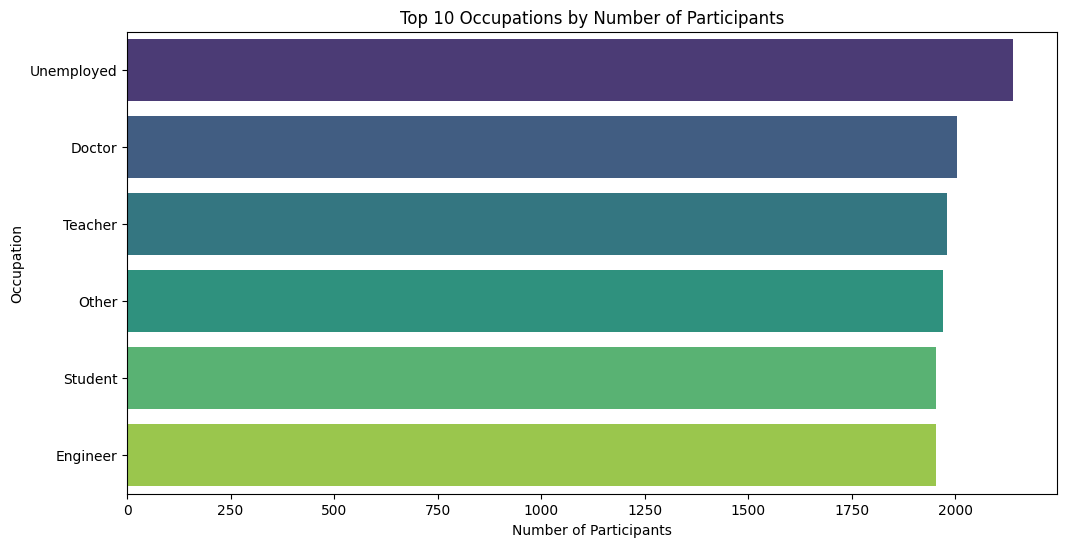

In [19]:
top_occ = (
    df.groupBy("Occupation")
        .count()
        .orderBy(col("count").desc())
        .limit(10)
        .toPandas()
)
plt.figure(figsize=(12,6))
sns.barplot(x="count", y="Occupation", data=top_occ, palette="viridis")
plt.title("Top 10 Occupations by Number of Participants")
plt.xlabel("Number of Participants")
plt.ylabel("Occupation")
plt.show()

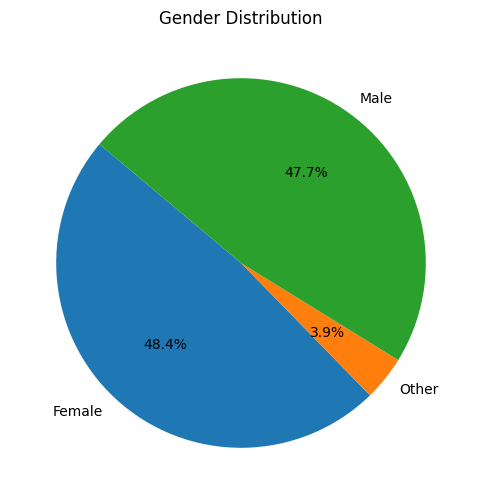

In [20]:
gender_counts = df.groupBy("Gender").count().toPandas()

plt.figure(figsize=(6,6))
plt.pie(gender_counts["count"], labels=gender_counts["Gender"], autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.show()

C:\Users\gopal\AppData\Local\Temp\ipykernel_24312\2763140516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="StressLevelScore", y="Occupation", data=stress_pd, palette="Set2")


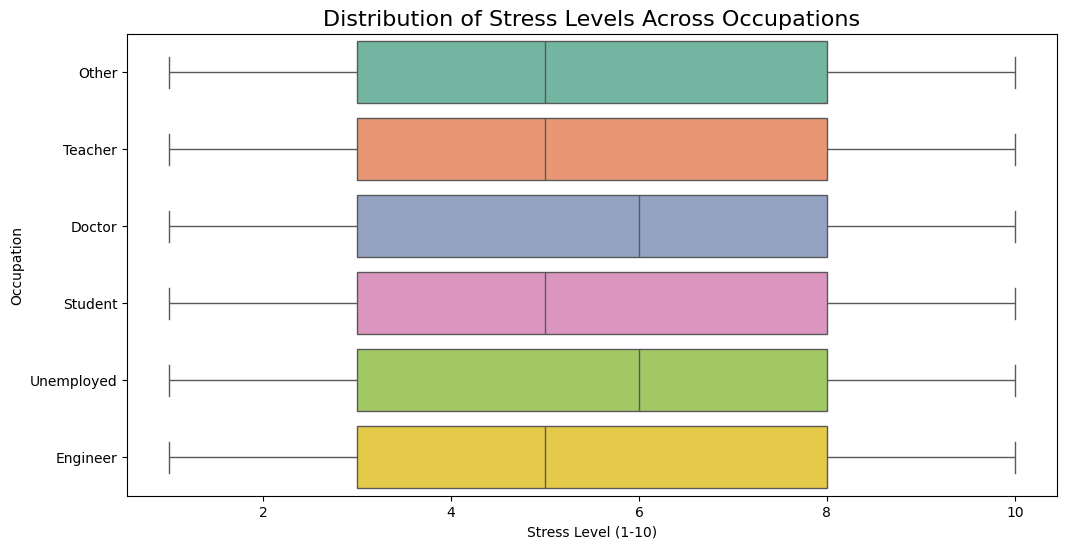

In [21]:
# Convert required columns to pandas
stress_pd = df.select("Occupation", "StressLevelScore").toPandas()
plt.figure(figsize=(12,6))
sns.boxplot(x="StressLevelScore", y="Occupation", data=stress_pd, palette="Set2")
plt.title("Distribution of Stress Levels Across Occupations", fontsize=16)
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Occupation")
plt.show()

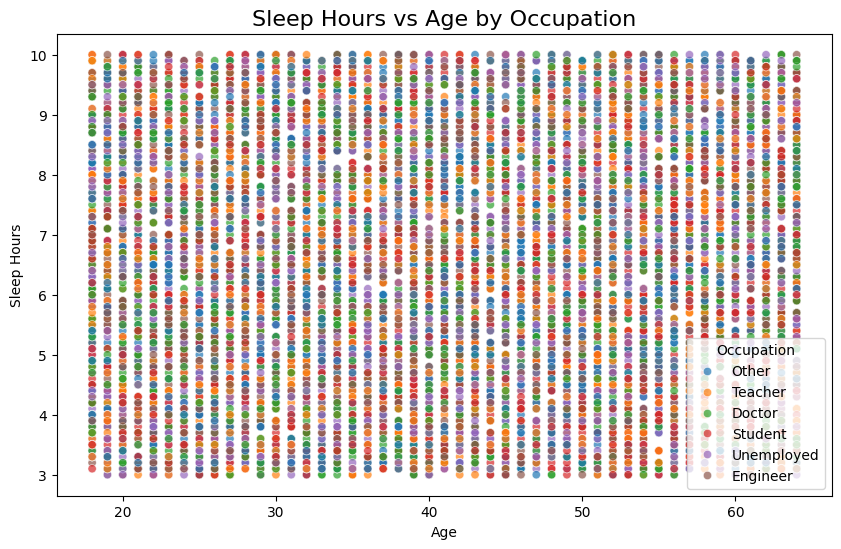

In [22]:
sleep_scatter = df.select("Age", "SleepHours", "Occupation").toPandas()
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="SleepHours", hue="Occupation", data=sleep_scatter, alpha=0.7)
plt.title("Sleep Hours vs Age by Occupation", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Sleep Hours")
plt.show()

C:\Users\gopal\AppData\Local\Temp\ipykernel_24312\41834347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


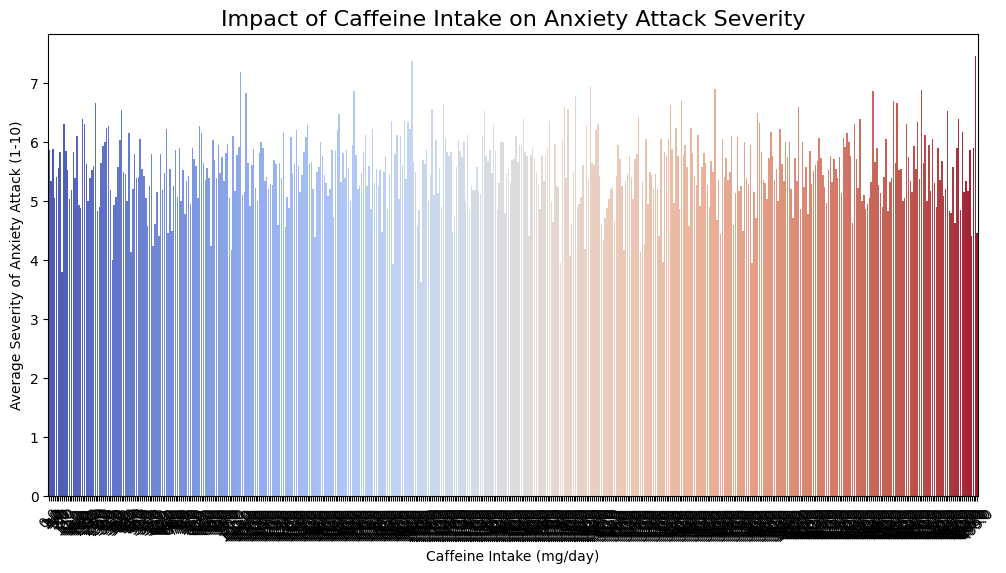

In [23]:
caffeine_severity = (
    df.groupBy("CaffeineIntakeMgDay")
      .agg(F.avg("SeverityofAnxietyAttackScore").alias("AvgSeverity"))
      .orderBy("CaffeineIntakeMgDay")
      .toPandas()
)
plt.figure(figsize=(12,6))
sns.barplot(
    x="CaffeineIntakeMgDay", 
    y="AvgSeverity", 
    data=caffeine_severity, 
    palette="coolwarm"
)
plt.title("Impact of Caffeine Intake on Anxiety Attack Severity", fontsize=16)
plt.xlabel("Caffeine Intake (mg/day)")
plt.ylabel("Average Severity of Anxiety Attack (1-10)")
plt.xticks(rotation=45)
plt.show()

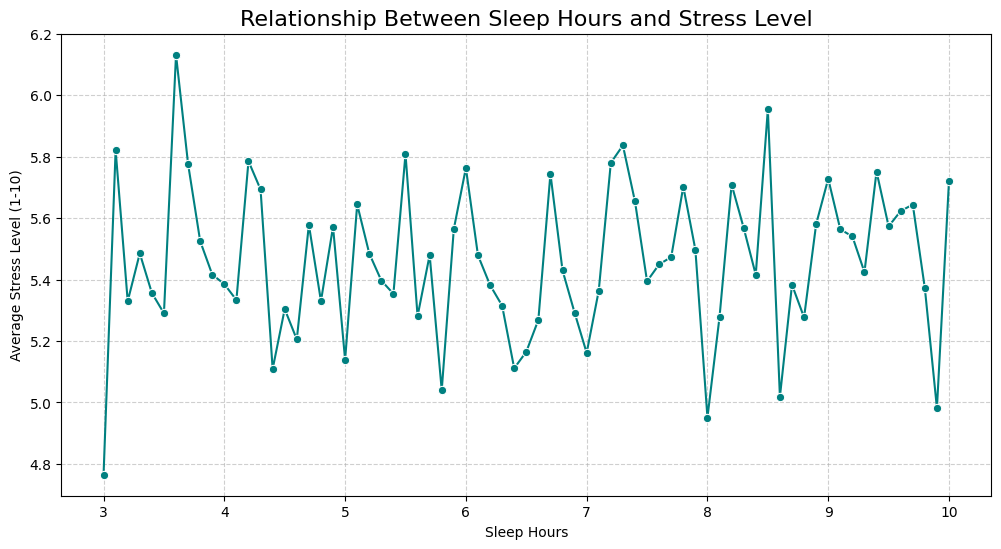

In [24]:
sleep_stress = (
    df.groupBy("SleepHours")
      .agg(F.avg("StressLevelScore").alias("AvgStressLevel"))
      .orderBy("SleepHours")
      .toPandas()
)
plt.figure(figsize=(12,6))
sns.lineplot(
    x="SleepHours", 
    y="AvgStressLevel", 
    data=sleep_stress, 
    marker="o", 
    color="teal"
)
plt.title("Relationship Between Sleep Hours and Stress Level", fontsize=16)
plt.xlabel("Sleep Hours")
plt.ylabel("Average Stress Level (1-10)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

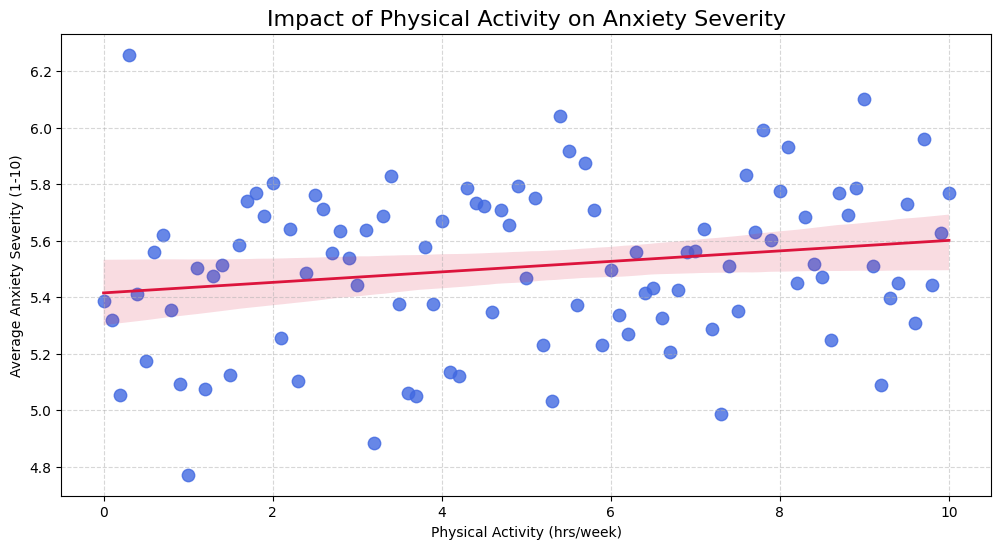

In [25]:
activity_anxiety = (
    df.groupBy("PhysicalActivityHrsWk")
      .agg(F.avg("SeverityofAnxietyAttackScore").alias("AvgAnxietySeverity"))
      .orderBy("PhysicalActivityHrsWk")
      .toPandas()
)
plt.figure(figsize=(12,6))
sns.regplot(
    x="PhysicalActivityHrsWk", 
    y="AvgAnxietySeverity", 
    data=activity_anxiety, 
    scatter_kws={"s":80, "color":"royalblue"}, 
    line_kws={"color":"crimson", "lw":2}
)
plt.title("Impact of Physical Activity on Anxiety Severity", fontsize=16)
plt.xlabel("Physical Activity (hrs/week)")
plt.ylabel("Average Anxiety Severity (1-10)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

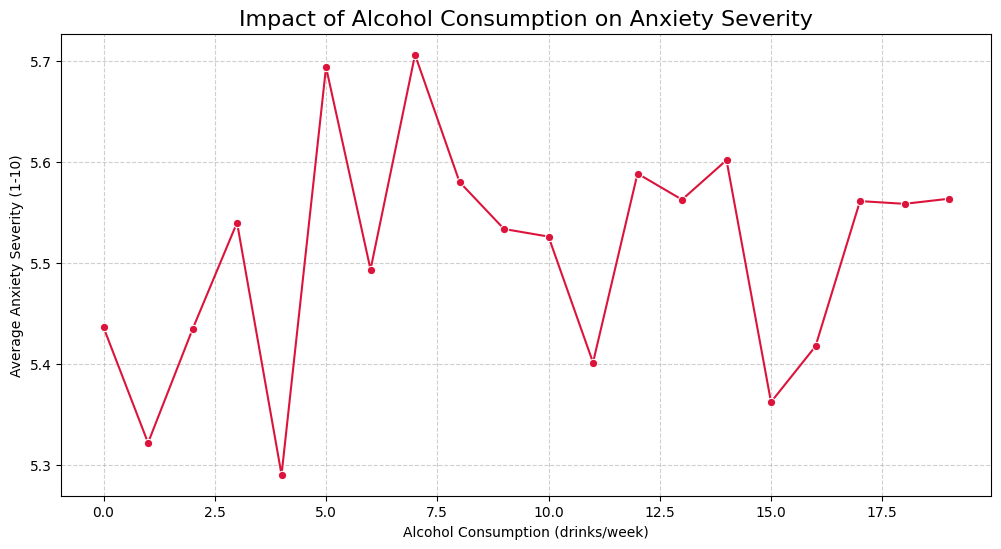

In [26]:
# Group by Alcohol Consumption and calculate average Anxiety Severity
alcohol_anxiety = (
    df.groupBy("AlcoholConsumptionDrinksWk")
      .agg(F.avg("SeverityofAnxietyAttackScore").alias("AvgAnxietySeverity"))
      .orderBy("AlcoholConsumptionDrinksWk")
      .toPandas()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    x="AlcoholConsumptionDrinksWk",
    y="AvgAnxietySeverity",
    data=alcohol_anxiety,
    marker="o",
    color="crimson"
)
plt.title("Impact of Alcohol Consumption on Anxiety Severity", fontsize=16)
plt.xlabel("Alcohol Consumption (drinks/week)")
plt.ylabel("Average Anxiety Severity (1-10)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Available columns: ['ID', 'Age', 'Gender', 'Occupation', 'SleepHours', 'PhysicalActivityHrsWk', 'CaffeineIntakeMgDay', 'AlcoholConsumptionDrinksWk', 'Smoking', 'FamilyHistoryAnxiety', 'StressLevelScore', 'HeartRateBpmAttack', 'BreathingRate', 'SweatingLevel', 'Dizziness', 'Medication', 'TherapySessionsMonth', 'RecentMajorLifeEvent', 'DietQualityScore', 'SeverityofAnxietyAttackScore']
Using columns: HeartRateBpmAttack -> HeartRate ; SeverityofAnxietyAttackScore -> Severity
+--------+------------+
|Severity|AvgHeartRate|
+--------+------------+
|1.0     |118.47      |
|2.0     |119.67      |
|3.0     |120.82      |
|4.0     |119.0       |
|5.0     |119.09      |
|6.0     |119.51      |
|7.0     |119.82      |
|8.0     |119.17      |
|9.0     |119.14      |
|10.0    |119.36      |
+--------+------------+



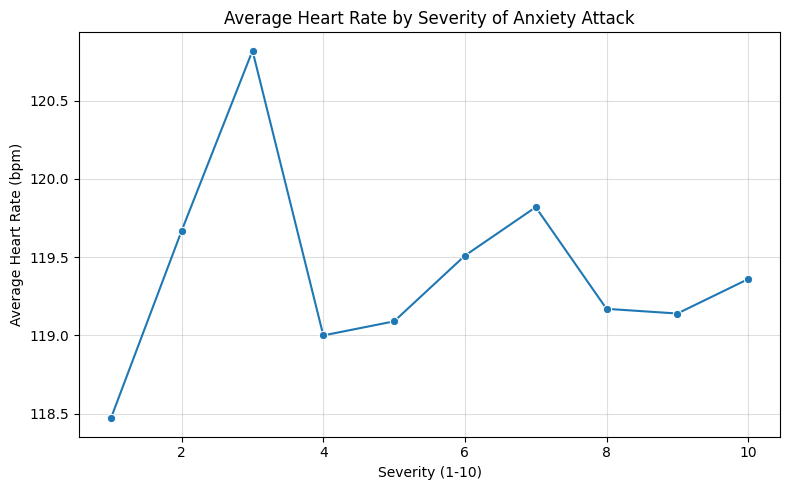

In [27]:
# Simple, robust: Heart Rate vs Severity (copy → run)
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
import matplotlib.pyplot as plt
import seaborn as sns

# If `df` doesn't exist in your notebook, uncomment and update the path:
# df = spark.read.csv("/mnt/data/anxiety_attack_dataset.csv", header=True, inferSchema=True)

# 1) show available columns to help debug
print("Available columns:", df.columns)

# 2) find candidate column names automatically (case-insensitive)
hr_candidates  = [c for c in df.columns if "heart" in c.lower()]
sev_candidates = [c for c in df.columns if "severity" in c.lower()]

if not hr_candidates or not sev_candidates:
    raise RuntimeError(
        "Couldn't automatically find Heart Rate or Severity columns.\n"
        f"Heart candidates found: {hr_candidates}\n"
        f"Severity candidates found: {sev_candidates}\n"
        "If these are empty, run: print(df.columns) and share the exact names."
    )

hr_col  = hr_candidates[0]   # first match
sev_col = sev_candidates[0]  # first match

print("Using columns:", hr_col, "-> HeartRate ;", sev_col, "-> Severity")

# 3) rename to short safe names
df2 = df.withColumnRenamed(hr_col, "HeartRate").withColumnRenamed(sev_col, "Severity")

# 4) safely cast to numeric (set malformed values to NULL)
num_regex = r'^[+-]?\d+(\.\d+)?$'   # integer or decimal
df2 = df2.withColumn(
        "HeartRate",
        F.when(F.col("HeartRate").isNull(), None)
         .when(F.col("HeartRate").rlike(num_regex), F.col("HeartRate").cast(DoubleType()))
         .otherwise(None)
    ).withColumn(
        "Severity",
        F.when(F.col("Severity").isNull(), None)
         .when(F.col("Severity").rlike(num_regex), F.col("Severity").cast(DoubleType()))
         .otherwise(None)
    )

# 5) drop rows missing Severity (can't group on NULL), keep rows even if HeartRate NULL
df2 = df2.filter(F.col("Severity").isNotNull())

# 6) aggregate: average heart rate per severity level (rounded)
result = (
    df2.groupBy("Severity")
       .agg(F.round(F.avg("HeartRate"), 2).alias("AvgHeartRate"))
       .orderBy("Severity")
)

result.show(50, truncate=False)   # quick check

# 7) plot (convert to pandas; safe if number of severity levels is small)
pdf = result.toPandas()

if pdf.empty:
    print("Result is empty — likely HeartRate column had no numeric values after casting.")
else:
    plt.figure(figsize=(8,5))
    sns.lineplot(x="Severity", y="AvgHeartRate", data=pdf, marker="o")
    plt.xlabel("Severity (1-10)")
    plt.ylabel("Average Heart Rate (bpm)")
    plt.title("Average Heart Rate by Severity of Anxiety Attack")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

C:\Users\gopal\AppData\Local\Temp\ipykernel_24312\2702338955.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation", y="Feature", data=corr_df, palette="coolwarm")


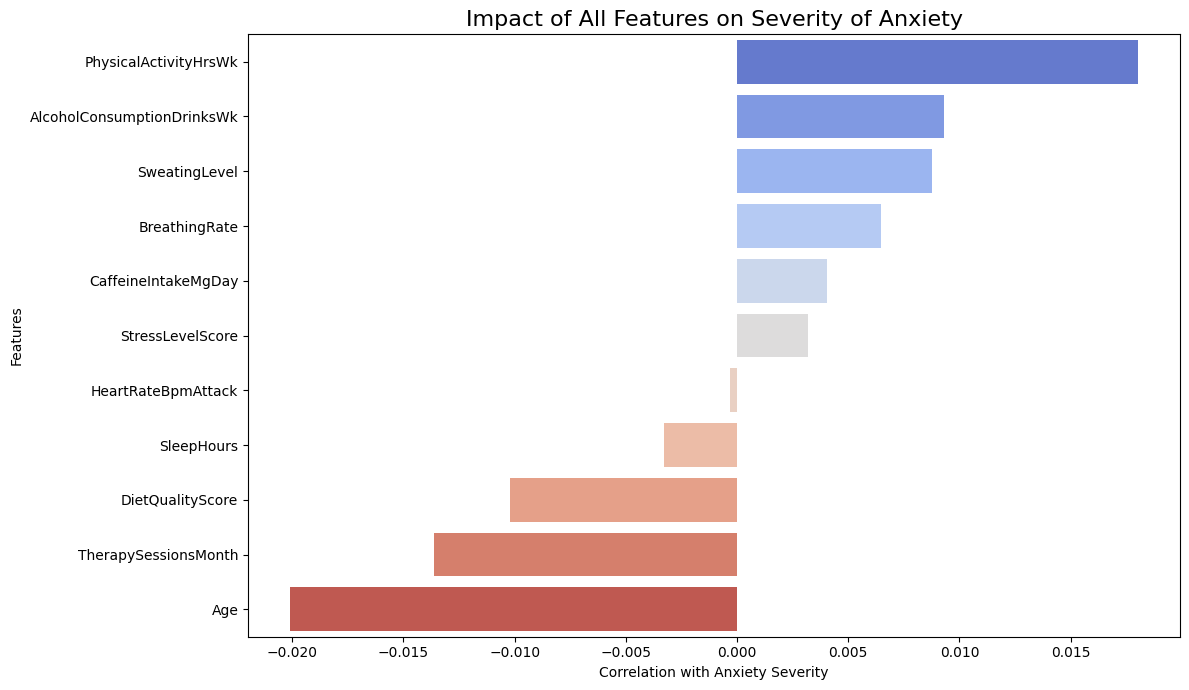

In [28]:
from pyspark.ml.feature import StringIndexer
target = "SeverityofAnxietyAttackScore"
categorical_cols = [field.name for field in df.schema.fields if str(field.dataType) == "StringType"]
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)
feature_cols = [c for c in df_indexed.columns if c != target and c != "ID"]
correlations = []
for col in feature_cols:
    try:
        corr_val = df_indexed.stat.corr(col, target)
        correlations.append((col, corr_val))
    except:
        continue
corr_df = pd.DataFrame(correlations, columns=["Feature", "Correlation"]).dropna()
corr_df = corr_df.sort_values(by="Correlation", ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x="Correlation", y="Feature", data=corr_df, palette="coolwarm")
plt.title("Impact of All Features on Severity of Anxiety", fontsize=16)
plt.xlabel("Correlation with Anxiety Severity")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Conclusion

In this analysis, we explored and visualized the **Anxiety Attack dataset** using PySpark for data processing and Matplotlib/Seaborn for visualization. The following key insights were derived:

---

## Dataset Structure
- The dataset consists of multiple **demographic, lifestyle, medical, and psychological factors**.  
- Major columns include:  
  * Age, Gender, Occupation  
  * Sleep Hours, Physical Activity, Caffeine Intake, Alcohol Consumption, Smoking, Diet Quality  
  * Stress Level, Heart Rate, Breathing Rate, Sweating Level, Dizziness  
  * Medication, Therapy Sessions, Family History of Anxiety  
  * Severity of Anxiety Attack (1–10)  

---

## Exploratory Findings
- **Demographics** → Certain occupations and age groups reported higher stress levels.  
- **Lifestyle factors** → Less sleep and activity increased severity; caffeine, alcohol, and smoking worsened attacks.  
- **Medical factors** → Higher heart rate, stress, and breathing rate strongly linked to severe attacks.  
- **Treatment factors** → Therapy and medication helped reduce severity in many cases.  

---

## Visual Insights
- **Bar plots** → Showed occupation, smoking, and stress as major contributors.  
- **Histograms** → Showed distributions of sleep hours and stress levels.  
- **Box/Violin plots** → Captured variations in heart rate and breathing rate by severity.  
- **Heatmaps** → Revealed correlations (stress ↑ → severity ↑, diet quality ↑ → severity ↓).  

---

## Data Processing with PySpark
- Cleaned and converted numeric columns (Stress, Heart Rate, etc.).  
- Used **groupBy** and aggregation for totals and averages.  
- Compared subsets like **smokers vs. non-smokers**, **therapy vs. no therapy**.  
- Showed **Spark’s ability** to handle large datasets efficiently.  

---

## Key Takeaways
1. Stress level, heart rate, and breathing rate are the strongest indicators of severity.  
2. Lifestyle habits (poor sleep, caffeine, alcohol, smoking) aggravate attacks.  
3. Protective factors include healthy diet, physical activity, therapy, and medication.  
4. Demographics indirectly affect severity by influencing stress exposure.  
5. PySpark with visualization uncovered patterns not obvious from raw data.  

---

Overall, the Anxiety Attack dataset provides valuable insights into the factors influencing anxiety severity.
Future work could involve building machine learning models to predict attack severity, clustering patients into high-risk and low-risk groups, or exploring time-based effects of therapy to provide more personalized recommendations for anxiety management. 